Name: Arya Sun
<br>
Github Username: fearofhelicopter
<br>
USC ID: 8111052837

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, hamming_loss, silhouette_score
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

from imblearn.over_sampling import SMOTE

### (a) Download the Anuran Calls (MFCCs) Data Set
from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data
randomly as the training set.

In [2]:
dataPath = "../data/Anuran Calls (MFCCs)"
df = pd.read_csv(os.path.join(dataPath, "Frogs_MFCCs.csv"))

df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
dfTrain = df.sample(frac = 0.7)
dfTest = df[~np.isin(df.index, dfTrain.index)]

dfTrain.reset_index(drop=True, inplace=True)
dfTest.reset_index(drop=True, inplace=True)
print("Train Shape: ", dfTrain.shape)
print("Test Shape: ", dfTest.shape)

y_cols = ['Family', 'Genus', 'Species']
Y_train = dfTrain[y_cols]
Y_test = dfTest[y_cols]

dfTrain_X = dfTrain.drop(y_cols, axis=1)
dfTest_X = dfTest.drop(y_cols, axis=1)

dfTrain_X = dfTrain_X.drop("RecordID", axis=1)
dfTest_X = dfTest_X.drop("RecordID", axis=1)

scaler = StandardScaler()
scaler.fit(dfTrain_X)

dfTrain_X = scaler.transform(dfTrain_X)
dfTest_X = scaler.transform(dfTest_X)

dfTrain_X = pd.DataFrame(dfTrain_X)
dfTrain_X.columns = dfTrain.columns[0:22]
dfTest_X = pd.DataFrame(dfTest_X)
dfTest_X.columns = dfTrain.columns[0:22]

Train Shape:  (5036, 26)
Test Shape:  (2159, 26)


### (b) Train a classifier for each label
Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

#### (i) Research
exact match and hamming score/loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.

Accuracy score/Exact match metric: This function calculates subset accuracy meaning the predicted set of labels should exactly match with the true set of labels.

Hamming Loss: The fraction of the wrong labels to the total number of labels

#### (ii) Train a SVM for each of the labels
using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [4]:
def tuningSVM(dfTrain_X, dfTrain_Y, param_grid):
    svm = SVC(kernel="rbf", random_state=42)
    ovr_classifier = OneVsRestClassifier(svm)
    grid_search = GridSearchCV(ovr_classifier, param_grid, cv=10, n_jobs= -1)
    grid_search.fit(dfTrain_X, dfTrain_Y)
    return grid_search.best_params_

In [5]:
## Family ##
dfTrain_Y = Y_train[y_cols[0]]
dfTest_Y = Y_test[y_cols[0]]

param_grid = {
    'estimator__C': np.logspace(-3, 6, 10),
    'estimator__gamma': np.linspace(0.1, 2, 20)
}

best_params = tuningSVM(dfTrain_X, dfTrain_Y, param_grid)
print("best hyperparameters: ", best_params)

svm = SVC(kernel="rbf", C=best_params['estimator__C'], gamma=best_params['estimator__gamma'], random_state=42)
ovr_classifier = OneVsRestClassifier(svm)
ovr_classifier.fit(dfTrain_X, dfTrain_Y)

dfTest_pred = ovr_classifier.predict(dfTest_X)

exact_match = accuracy_score(Y_test[y_cols[0]], dfTest_pred)
hamming_loss_val = hamming_loss(Y_test[y_cols[0]], dfTest_pred)
print("Family - Exact Match: {}, Hamming Loss: {}".format(exact_match, hamming_loss_val))
print("Family classification report:\n", classification_report(dfTest_Y, dfTest_pred))

## Genus ##
dfTrain_Y = Y_train[y_cols[1]]
dfTest_Y = Y_test[y_cols[1]]

svm = SVC(kernel="rbf", C=best_params['estimator__C'], gamma=best_params['estimator__gamma'], random_state=42)
ovr_classifier = OneVsRestClassifier(svm)
ovr_classifier.fit(dfTrain_X, dfTrain_Y)

dfTest_pred = ovr_classifier.predict(dfTest_X)

exact_match = accuracy_score(Y_test[y_cols[1]], dfTest_pred)
hamming_loss_val = hamming_loss(Y_test[y_cols[1]], dfTest_pred)
print("Genus - Exact Match: {}, Hamming Loss: {}".format(exact_match, hamming_loss_val))
print("Genus classification report:\n", classification_report(dfTest_Y, dfTest_pred))

## Species ##
dfTrain_Y = Y_train[y_cols[2]]
dfTest_Y = Y_test[y_cols[2]]

svm = SVC(kernel="rbf", C=best_params['estimator__C'], gamma=best_params['estimator__gamma'], random_state=42)
ovr_classifier = OneVsRestClassifier(svm)
ovr_classifier.fit(dfTrain_X, dfTrain_Y)

dfTest_pred = ovr_classifier.predict(dfTest_X)

exact_match = accuracy_score(Y_test[y_cols[2]], dfTest_pred)
hamming_loss_val = hamming_loss(Y_test[y_cols[2]], dfTest_pred)
print("Species - Exact Match: {}, Hamming Loss: {}".format(exact_match, hamming_loss_val))
print("Species classification report:\n", classification_report(dfTest_Y, dfTest_pred))

best hyperparameters:  {'estimator__C': 10.0, 'estimator__gamma': 0.1}
Family - Exact Match: 0.9921259842519685, Hamming Loss: 0.007874015748031496
Family classification report:
                  precision    recall  f1-score   support

      Bufonidae       1.00      0.90      0.95        21
  Dendrobatidae       0.99      1.00      1.00       159
        Hylidae       0.98      0.99      0.99       665
Leptodactylidae       1.00      0.99      0.99      1314

       accuracy                           0.99      2159
      macro avg       0.99      0.97      0.98      2159
   weighted avg       0.99      0.99      0.99      2159

Genus - Exact Match: 0.9879573876794813, Hamming Loss: 0.012042612320518759
Genus classification report:
                precision    recall  f1-score   support

    Adenomera       0.99      0.99      0.99      1241
     Ameerega       0.99      1.00      1.00       159
Dendropsophus       0.98      0.95      0.97       104
    Hypsiboas       0.97      0.99 

#### (iii) Repeat 1(b)ii with L1-penalized SVMs
Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [6]:
def tuningLinearSVM(dfTrain_X, dfTrain_Y, param_grid, penalty):
    svm = LinearSVC(penalty=penalty, dual=False, max_iter=10000)
    grid_search = GridSearchCV(svm, param_grid, cv=10, n_jobs = -1)
    grid_search.fit(dfTrain_X, dfTrain_Y)
    return grid_search.best_params_

In [7]:
## Family ##
dfTrain_Y = Y_train[y_cols[0]]
dfTest_Y = Y_test[y_cols[0]]

param_grid = {
    'C': np.logspace(-3, 6, 10)
}

best_params = tuningLinearSVM(dfTrain_X, dfTrain_Y, param_grid, penalty='l1')
print("best hyperparameters: ", best_params)

svm = LinearSVC(penalty='l1', C=best_params['C'], loss='squared_hinge', dual=False, max_iter=10000)
ovr_classifier = OneVsRestClassifier(svm)
ovr_classifier.fit(dfTrain_X, dfTrain_Y)

dfTest_pred = ovr_classifier.predict(dfTest_X)

exact_match = accuracy_score(Y_test[y_cols[0]], dfTest_pred)
hamming_loss_val = hamming_loss(Y_test[y_cols[0]], dfTest_pred)
print("Family - Exact Match: {}, Hamming Loss: {}".format(exact_match, hamming_loss_val))
print("Family classification report:\n", classification_report(dfTest_Y, dfTest_pred, zero_division=1))

## Genus ##
dfTrain_Y = Y_train[y_cols[1]]
dfTest_Y = Y_test[y_cols[1]]

svm = LinearSVC(penalty='l1', C=best_params['C'], loss='squared_hinge', dual=False, max_iter=10000)
ovr_classifier = OneVsRestClassifier(svm)
ovr_classifier.fit(dfTrain_X, dfTrain_Y)

dfTest_pred = ovr_classifier.predict(dfTest_X)

exact_match = accuracy_score(Y_test[y_cols[1]], dfTest_pred)
hamming_loss_val = hamming_loss(Y_test[y_cols[1]], dfTest_pred)
print("Genus - Exact Match: {}, Hamming Loss: {}".format(exact_match, hamming_loss_val))
print("Genus classification report:\n", classification_report(dfTest_Y, dfTest_pred, zero_division=1))

## Species ##
dfTrain_Y = Y_train[y_cols[2]]
dfTest_Y = Y_test[y_cols[2]]

svm = LinearSVC(penalty='l1', C=best_params['C'], loss='squared_hinge', dual=False, max_iter=10000)
ovr_classifier = OneVsRestClassifier(svm)
ovr_classifier.fit(dfTrain_X, dfTrain_Y)

dfTest_pred = ovr_classifier.predict(dfTest_X)

exact_match = accuracy_score(Y_test[y_cols[2]], dfTest_pred)
hamming_loss_val = hamming_loss(Y_test[y_cols[2]], dfTest_pred)
print("Species - Exact Match: {}, Hamming Loss: {}".format(exact_match, hamming_loss_val))
print("Species classification report:\n", classification_report(dfTest_Y, dfTest_pred, zero_division=1))

best hyperparameters:  {'C': 10.0}
Family - Exact Match: 0.936544696618805, Hamming Loss: 0.063455303381195
Family classification report:
                  precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        21
  Dendrobatidae       0.87      0.91      0.89       159
        Hylidae       0.93      0.89      0.91       665
Leptodactylidae       0.95      0.98      0.96      1314

       accuracy                           0.94      2159
      macro avg       0.69      0.69      0.69      2159
   weighted avg       0.93      0.94      0.93      2159

Genus - Exact Match: 0.9467345993515517, Hamming Loss: 0.053265400648448355
Genus classification report:
                precision    recall  f1-score   support

    Adenomera       0.96      0.98      0.97      1241
     Ameerega       0.89      0.95      0.92       159
Dendropsophus       0.98      0.61      0.75       104
    Hypsiboas       0.93      0.97      0.95       477
Leptodactylus       

#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [8]:
from imblearn.over_sampling import SMOTE

def tuningLinearSVM_SMOTE(dfTrain_X, dfTrain_Y, param_grid, penalty):
    svm = LinearSVC(penalty=penalty, dual=False, max_iter=10000)
    grid_search = GridSearchCV(svm, param_grid, cv=10, n_jobs = -1)
    
    # Oversample the minority class using SMOTE
    oversample = SMOTE()
    dfTrain_X_resampled, dfTrain_Y_resampled = oversample.fit_resample(dfTrain_X, dfTrain_Y)
    
    grid_search.fit(dfTrain_X_resampled, dfTrain_Y_resampled)
    return grid_search.best_params_

In [9]:
## Family ##
dfTrain_Y = Y_train[y_cols[0]]
dfTest_Y = Y_test[y_cols[0]]

param_grid = {
    'C': np.logspace(-3, 6, 10)
}

best_params = tuningLinearSVM_SMOTE(dfTrain_X, dfTrain_Y, param_grid, penalty='l1')
print("best hyperparameters: ", best_params)

svm = LinearSVC(penalty='l1', C=best_params['C'], loss='squared_hinge', dual=False, max_iter=10000)
ovr_classifier = OneVsRestClassifier(svm)

# Oversample the minority class using SMOTE
oversample = SMOTE()
dfTrain_X_resampled, dfTrain_Y_resampled = oversample.fit_resample(dfTrain_X, dfTrain_Y)

ovr_classifier.fit(dfTrain_X_resampled, dfTrain_Y_resampled)

dfTest_pred = ovr_classifier.predict(dfTest_X)

exact_match = accuracy_score(Y_test[y_cols[0]], dfTest_pred)
hamming_loss_val = hamming_loss(Y_test[y_cols[0]], dfTest_pred)
print("Family - Exact Match: {}, Hamming Loss: {}".format(exact_match, hamming_loss_val))
print("Family classification report:\n", classification_report(dfTest_Y, dfTest_pred, zero_division=1))

## Genus ##
dfTrain_Y = Y_train[y_cols[1]]
dfTest_Y = Y_test[y_cols[1]]

svm = LinearSVC(penalty='l1', C=best_params['C'], loss='squared_hinge', dual=False, max_iter=10000)
ovr_classifier = OneVsRestClassifier(svm)

# Oversample the minority class using SMOTE
oversample = SMOTE()
dfTrain_X_resampled, dfTrain_Y_resampled = oversample.fit_resample(dfTrain_X, dfTrain_Y)

ovr_classifier.fit(dfTrain_X_resampled, dfTrain_Y_resampled)

dfTest_pred = ovr_classifier.predict(dfTest_X)

exact_match = accuracy_score(Y_test[y_cols[1]], dfTest_pred)
hamming_loss_val = hamming_loss(Y_test[y_cols[1]], dfTest_pred)
print("Genus - Exact Match: {}, Hamming Loss: {}".format(exact_match, hamming_loss_val))
print("Genus classification report:\n", classification_report(dfTest_Y, dfTest_pred, zero_division=1))

## Species ##
dfTrain_Y = Y_train[y_cols[2]]
dfTest_Y = Y_test[y_cols[2]]

svm = LinearSVC(penalty='l1', C=best_params['C'], loss='squared_hinge', dual=False, max_iter=10000)
ovr_classifier = OneVsRestClassifier(svm)

# Oversample the minority class using SMOTE
oversample = SMOTE()
dfTrain_X_resampled, dfTrain_Y_resampled = oversample.fit_resample(dfTrain_X, dfTrain_Y)

ovr_classifier.fit(dfTrain_X_resampled, dfTrain_Y_resampled)

dfTest_pred = ovr_classifier.predict(dfTest_X)

exact_match = accuracy_score(Y_test[y_cols[2]], dfTest_pred)
hamming_loss_val = hamming_loss(Y_test[y_cols[2]], dfTest_pred)
print("Species - Exact Match: {}, Hamming Loss: {}".format(exact_match, hamming_loss_val))
print("Species classification report:\n", classification_report(dfTest_Y, dfTest_pred, zero_division=1))

best hyperparameters:  {'C': 10.0}
Family - Exact Match: 0.9133858267716536, Hamming Loss: 0.08661417322834646
Family classification report:
                  precision    recall  f1-score   support

      Bufonidae       0.32      0.95      0.48        21
  Dendrobatidae       0.70      1.00      0.82       159
        Hylidae       0.94      0.85      0.89       665
Leptodactylidae       0.97      0.94      0.95      1314

       accuracy                           0.91      2159
      macro avg       0.73      0.93      0.79      2159
   weighted avg       0.93      0.91      0.92      2159

Genus - Exact Match: 0.9008800370541917, Hamming Loss: 0.09911996294580824
Genus classification report:
                precision    recall  f1-score   support

    Adenomera       0.98      0.90      0.94      1241
     Ameerega       0.82      0.96      0.88       159
Dendropsophus       0.63      0.74      0.68       104
    Hypsiboas       0.95      0.91      0.93       477
Leptodactylus     

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

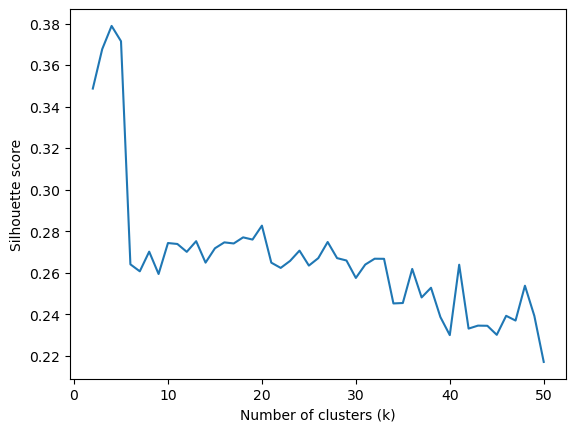

Optimal value of k: 4
Silhouette score for optimal k: 0.3788646212055977


In [10]:
X = df.drop(['RecordID', 'Family', 'Genus', 'Species'], axis=1)

k_values = range(2, 51)
silhouette_scores = []

for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    
    # Calculate the silhouette score
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for each value of k
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

max_silhouette = max(silhouette_scores)
optimal_k = silhouette_scores.index(max_silhouette) + 2
print(f"Optimal value of k: {optimal_k}")
print(f"Silhouette score for optimal k: {max_silhouette}")

### (b) Determine which family is the majority

In [11]:
# Fit KMeans model with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X)

# Add cluster labels to df
df['Cluster'] = kmeans.labels_

# Determine majority family, genus, and species for each cluster
majority_dict = {}

for i in range(optimal_k):
    cluster_df = df[df['Cluster'] == i]
    majority_family = cluster_df['Family'].value_counts().index[0]
    majority_genus = cluster_df['Genus'].value_counts().index[0]
    majority_species = cluster_df['Species'].value_counts().index[0]
    majority_dict[i] = {'Family': majority_family, 'Genus': majority_genus, 'Species': majority_species}

# Print majority family, genus, and species for each cluster
for i in range(optimal_k):
    print(f"Cluster {i}: "
      f"Majority Family = {majority_dict[i]['Family']}, "
      f"Majority Genus = {majority_dict[i]['Genus']}, "
      f"Majority Species = {majority_dict[i]['Species']}")

Cluster 0: Majority Family = Leptodactylidae, Majority Genus = Adenomera, Majority Species = AdenomeraHylaedactylus
Cluster 1: Majority Family = Dendrobatidae, Majority Genus = Ameerega, Majority Species = Ameeregatrivittata
Cluster 2: Majority Family = Hylidae, Majority Genus = Hypsiboas, Majority Species = HypsiboasCinerascens
Cluster 3: Majority Family = Hylidae, Majority Genus = Hypsiboas, Majority Species = HypsiboasCordobae


### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [12]:
def hamming_distance(y_true, y_pred):
    """Calculate Hamming distance between two label vectors."""
    return np.sum(y_true != y_pred)

def hamming_score(y_true, y_pred):
    """Calculate Hamming score between two label vectors."""
    return np.mean(y_true == y_pred)

def hamming_loss(y_true, y_pred):
    """Calculate Hamming loss between two label vectors."""
    return np.mean(y_true != y_pred)

In [13]:
# Calculate metrics for each value of k
hamming_distances = []
hamming_scores = []
hamming_losses = []

for k in range(2, 51):
    # Calculate Hamming metrics for each cluster label triplet
    y_true = Y_test.to_numpy()
    y_pred = np.zeros_like(y_true)

    for i in range(len(dfTest)):
        cluster_label = majority_dict[kmeans.labels_[i]]
        y_pred[i] = [cluster_label['Family'], cluster_label['Genus'], cluster_label['Species']]

    hd = np.mean([hamming_distance(y_true[i], y_pred[i]) for i in range(len(dfTest))])
    hs = np.mean([hamming_score(y_true[i], y_pred[i]) for i in range(len(dfTest))])
    hl = np.mean([hamming_loss(y_true[i], y_pred[i]) for i in range(len(dfTest))])

    hamming_distances.append(hd)
    hamming_scores.append(hs)
    hamming_losses.append(hl)

    print(f"k = {k}, Hamming distance = {hd:.3f}, Hamming score = {hs:.3f}, Hamming loss = {hl:.3f}")    

print(f"Average Hamming distance: {np.mean(hamming_distances):.3f}")
print(f"Average Hamming score: {np.mean(hamming_scores):.3f}")
print(f"Average Hamming loss: {np.mean(hamming_losses):.3f}")
print(f"Standard deviation of Hamming distances: {np.std(hamming_distances):.3f}")

k = 2, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 0.858
k = 3, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 0.858
k = 4, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 0.858
k = 5, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 0.858
k = 6, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 0.858
k = 7, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 0.858
k = 8, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 0.858
k = 9, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 0.858
k = 10, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 0.858
k = 11, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 0.858
k = 12, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 0.858
k = 13, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 0.858
k = 14, Hamming distance = 2.574, Hamming score = 0.142, Hamming loss = 

## 3. ISLR 12.6.2

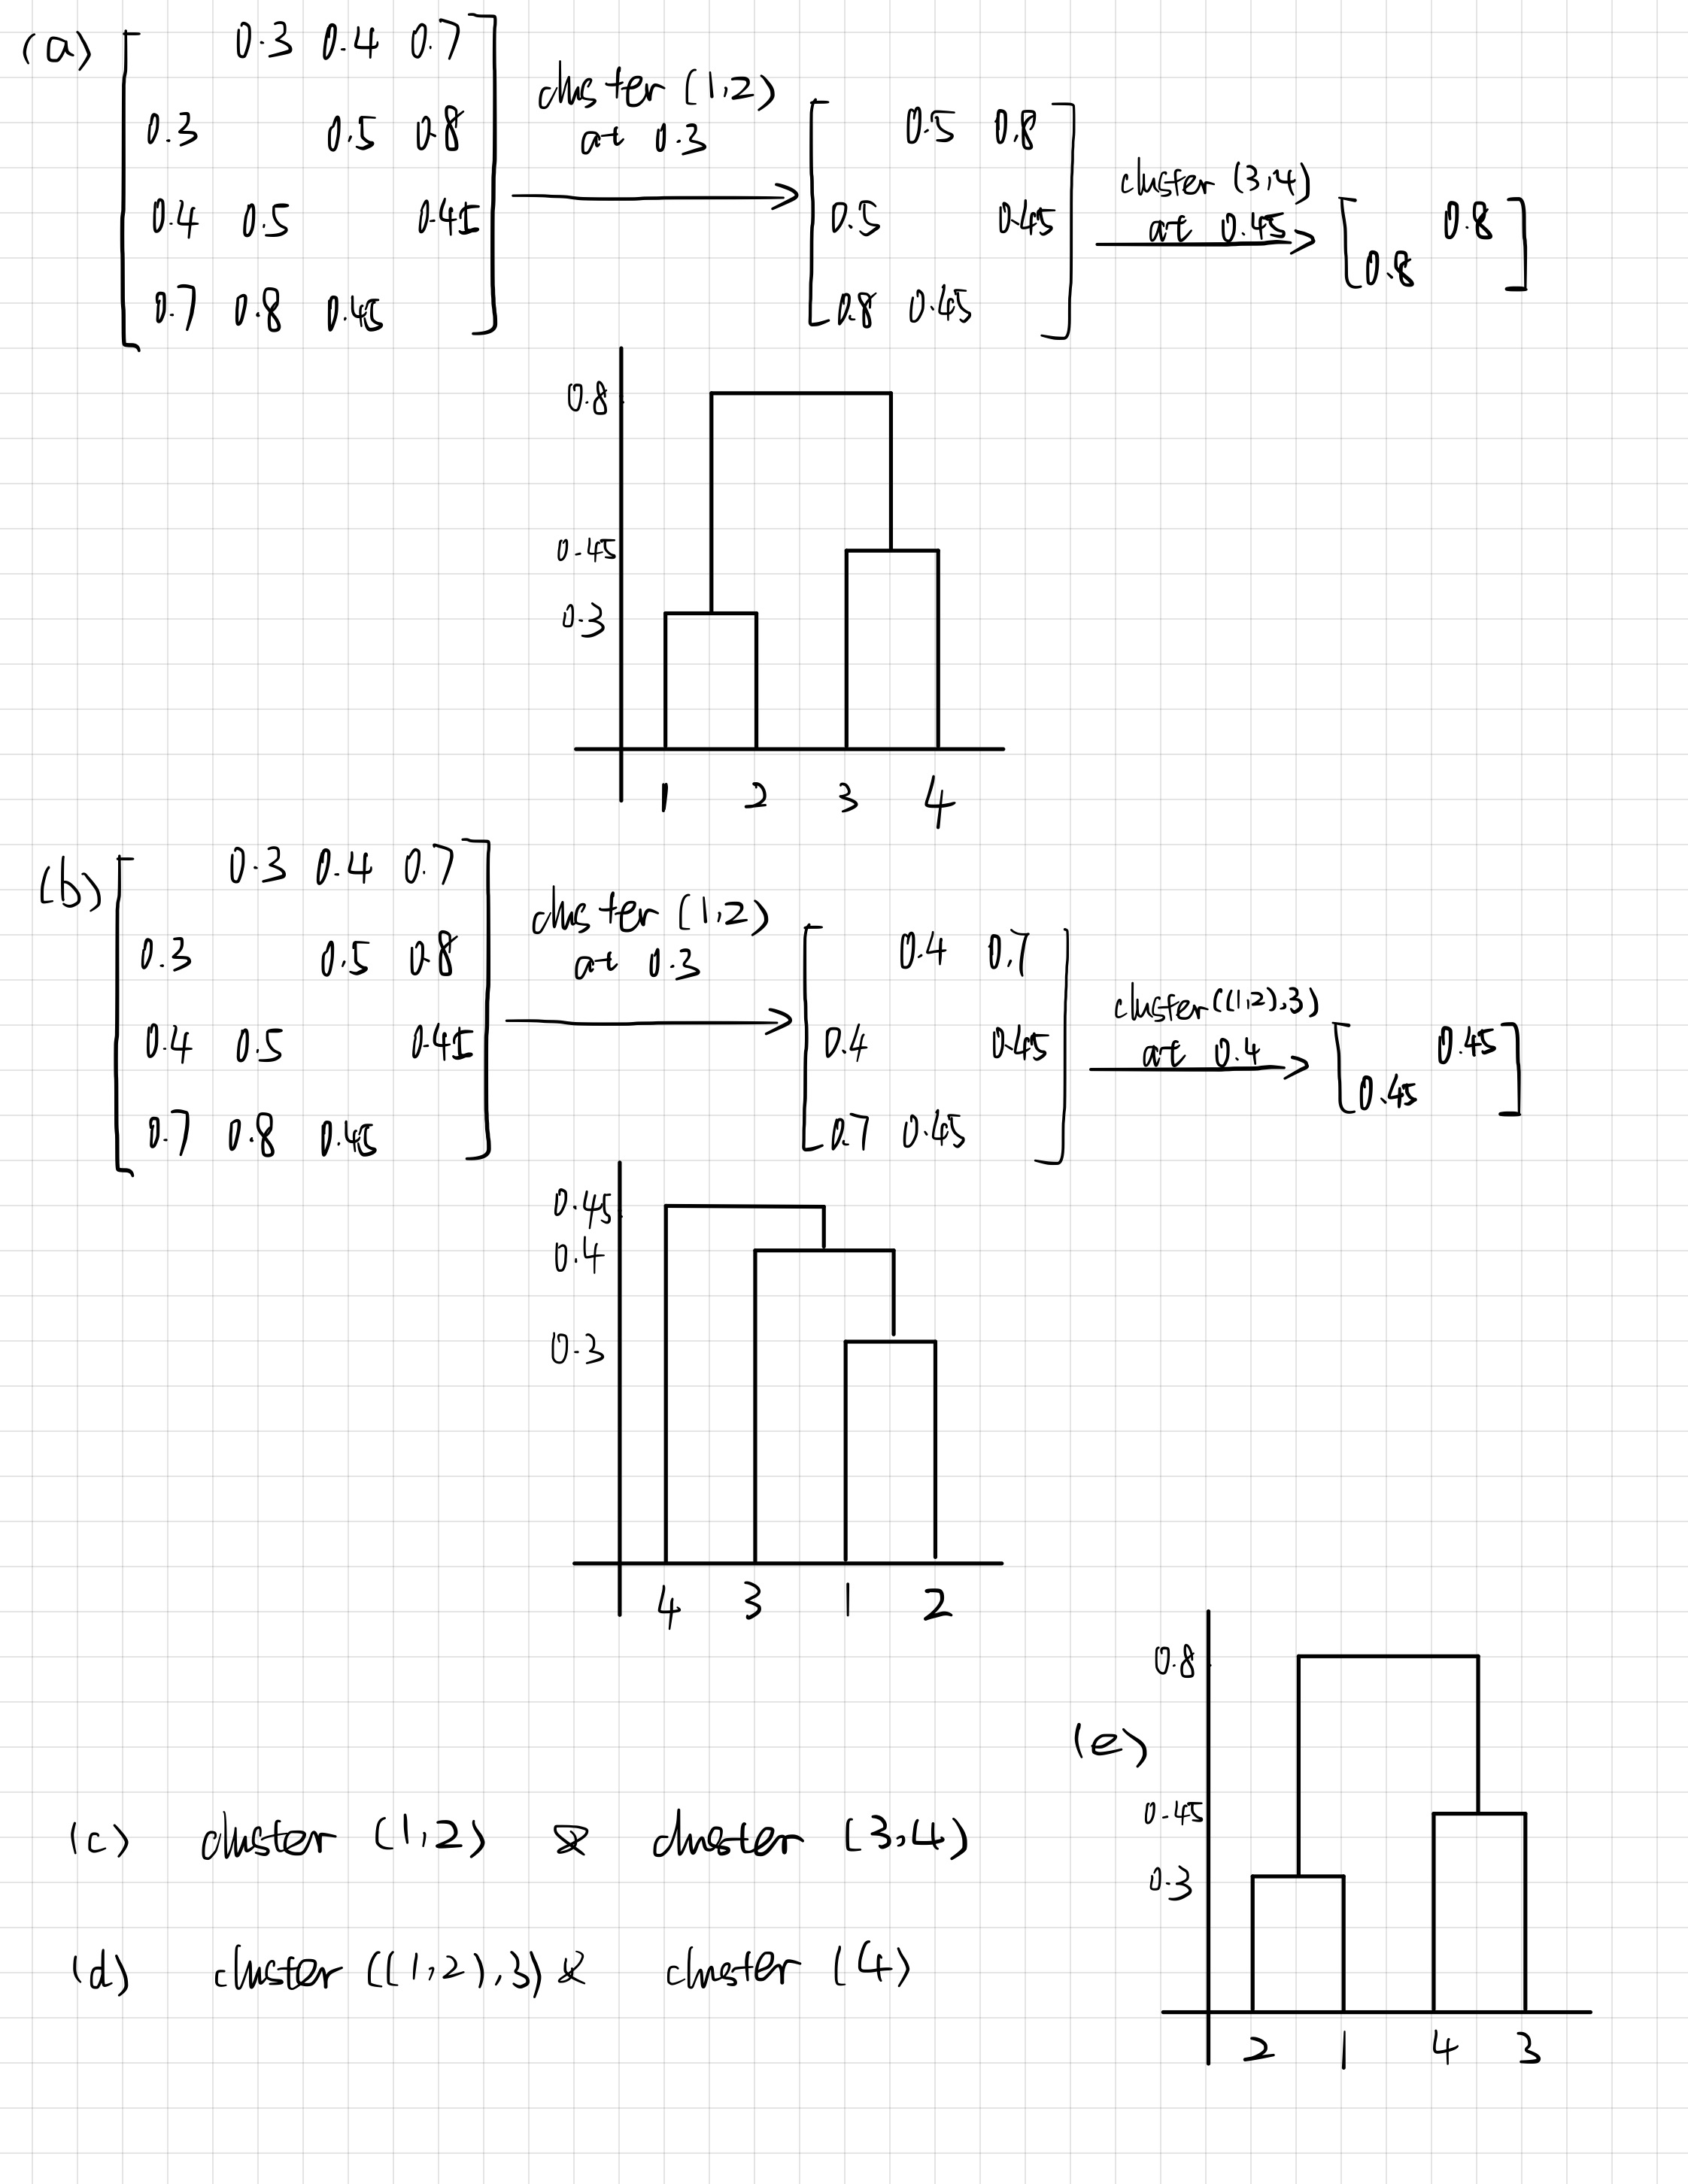